# Angular Force Constant Calculation

This script calculates the **angular force constant** \( k_\theta \) of water using DFT energy data and the harmonic approximation:

\[
\Delta E = \frac{1}{2} k_\theta (\Delta \theta)^2
\]

The result is reported in:

- Hartree/rad²  
- kcal/mol/rad²  
- kcal/mol/deg² (for LAMMPS)

Tip: Use small angle deviations (e.g. 1°) near equilibrium for accuracy.


In [ ]:
import numpy as np

theta_0_deg = 105.24
theta_1_deg = 104.24
E_0 = -76.42636593
E_1 = -76.42634167


delta_E = E_1 - E_0
delta_theta_rad = np.deg2rad(theta_1_deg - theta_0_deg)

k_hartree = 2 * delta_E / (delta_theta_rad ** 2)

hartree_to_kcalmol = 627.5095
k_kcalmol_rad2 = k_hartree * hartree_to_kcalmol
rad2_to_deg2 = (180 / np.pi) ** 2
k_kcalmol_deg2 = k_kcalmol_rad2 / rad2_to_deg2


print("Angular Force Constant Calculation\n")
print(f"ΔE           = {delta_E:.8f} Hartree")
print(f"Δθ           = {np.rad2deg(delta_theta_rad):.2f}° = {delta_theta_rad:.8f} rad\n")

print(f"Force Constant (kθ):")
print(f"- Hartree/rad²         = {k_hartree:.5f}")
print(f"- kcal/mol/rad²        = {k_kcalmol_rad2:.2f}")
print(f"- kcal/mol/deg²        = {k_kcalmol_deg2:.5f}")

Angular Force Constant Calculation

ΔE           = 0.00002426 Hartree
Δθ           = -1.00° = -0.01745329 rad

Force Constant (kθ):
- Hartree/rad²         = 0.15928
- kcal/mol/rad²        = 99.95
- kcal/mol/deg²        = 0.03045


# Water Force Constants Summary

This script creates a comparison table of water models showing:

- Equilibrium bond angle (°)  
- Angular force constant \( k_\theta \) in rad² and deg²  
- Notes on each model's purpose



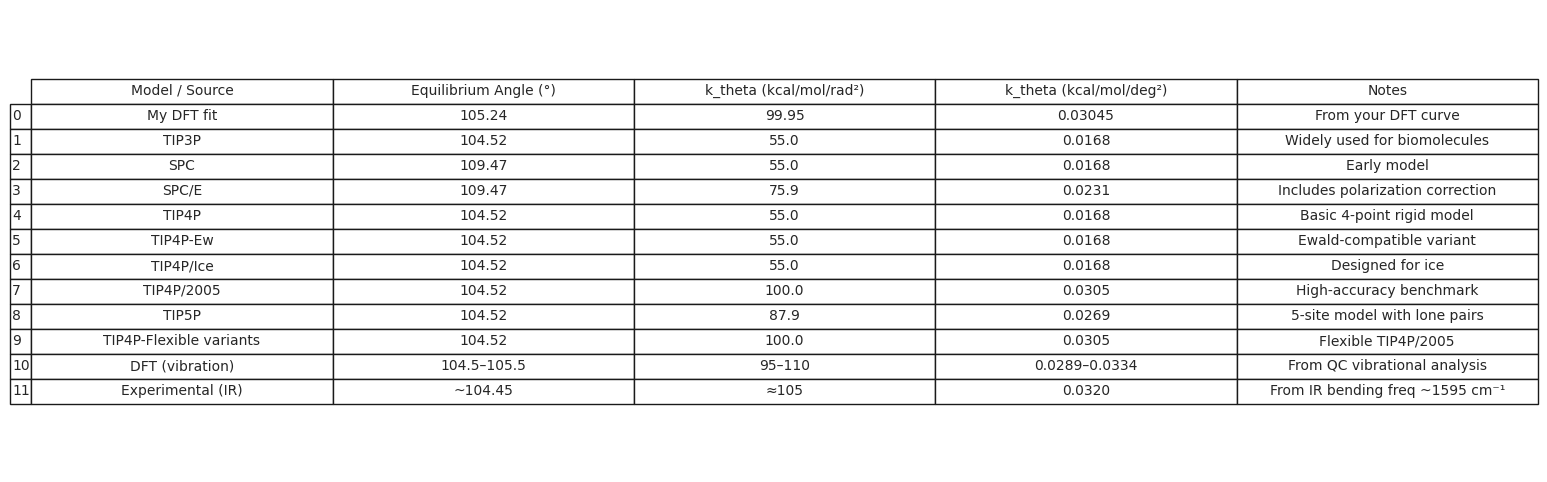

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import table

data = {
    "Model / Source": [
        "My DFT fit", "TIP3P", "SPC", "SPC/E", "TIP4P", "TIP4P-Ew", "TIP4P/Ice",
        "TIP4P/2005", "TIP5P", "TIP4P-Flexible variants", "DFT (vibration)", "Experimental (IR)"
    ],
    "Equilibrium Angle (°)": [
        105.24, 104.52, 109.47, 109.47, 104.52, 104.52, 104.52,
        104.52, 104.52, 104.52, "104.5–105.5", "~104.45"
    ],
    "k_theta (kcal/mol/rad²)": [
        99.95, 55.0, 55.0, 75.9, 55.0, 55.0, 55.0,
        100.0, 87.9, 100.0, "95–110", "≈105"
    ],
    "k_theta (kcal/mol/deg²)": [
        0.03045, 0.0168, 0.0168, 0.0231, 0.0168, 0.0168, 0.0168,
        0.0305, 0.0269, 0.0305, "0.0289–0.0334", "0.0320"
    ],
    "Notes": [
        "From your DFT curve", "Widely used for biomolecules", "Early model",
        "Includes polarization correction", "Basic 4-point rigid model",
        "Ewald-compatible variant", "Designed for ice", "High-accuracy benchmark",
        "5-site model with lone pairs", "Flexible TIP4P/2005",
        "From QC vibrational analysis", "From IR bending freq ~1595 cm⁻¹"
    ]
}

df = pd.DataFrame(data)

fig, ax = plt.subplots(figsize=(18, 6))
ax.axis('off')
tbl = table(ax, df, loc='center', cellLoc='center', colWidths=[0.18]*len(df.columns))

tbl.auto_set_font_size(False)
tbl.set_fontsize(10)
tbl.scale(1.2, 1.5)

plt.savefig("water_force_constants_table.jpg", dpi=300, bbox_inches='tight')
plt.show()


# Comparison of Angular Force Constants (kθ)

This script plots angular force constants \( k_\theta \) for various water models.


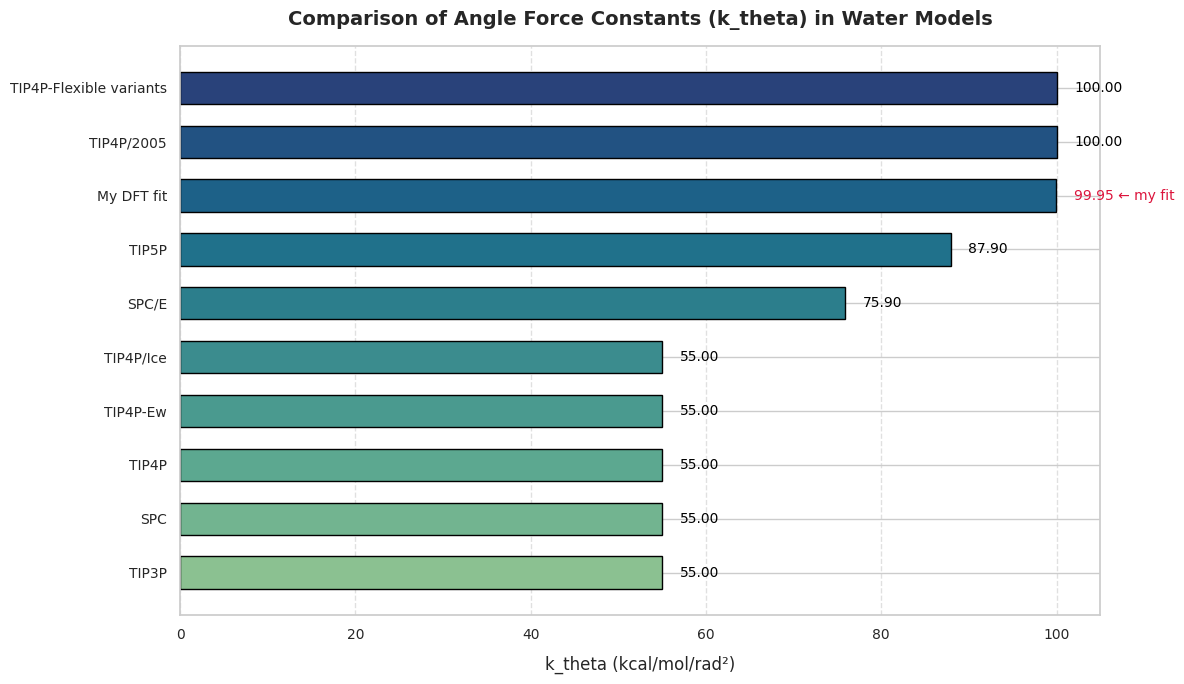

In [ ]:
import seaborn as sns

plot_df = df[df["k_theta (kcal/mol/rad²)"].apply(lambda x: isinstance(x, (int, float)))].copy()
plot_df = plot_df.sort_values("k_theta (kcal/mol/rad²)", ascending=True)

sns.set_style("whitegrid")
plt.figure(figsize=(12, 7))
colors = sns.color_palette("crest", len(plot_df))

bars = plt.barh(plot_df["Model / Source"], plot_df["k_theta (kcal/mol/rad²)"],
                color=colors, edgecolor='black', height=0.6)

for i, bar in enumerate(bars):
    width = bar.get_width()
    model_name = plot_df.iloc[i]["Model / Source"]

    label = f'{width:.2f}'
    color = 'black'

    if model_name.lower().startswith("my dft fit"):
        label += " ← my fit"
        color = 'crimson'

    plt.text(width + 2, bar.get_y() + bar.get_height() / 2,
             label, ha='left', va='center', fontsize=10, color=color)

plt.xlabel("k_theta (kcal/mol/rad²)", fontsize=12, labelpad=10)
plt.title("Comparison of Angle Force Constants (k_theta) in Water Models",
          fontsize=14, weight='bold', pad=15)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()

plt.savefig("plot_horizontal_bar_corrected.jpg", dpi=400, bbox_inches='tight')
plt.show()


# Equilibrium Bond Angles of Water Models

This script plots the **H–O–H bond angles** for common water models.

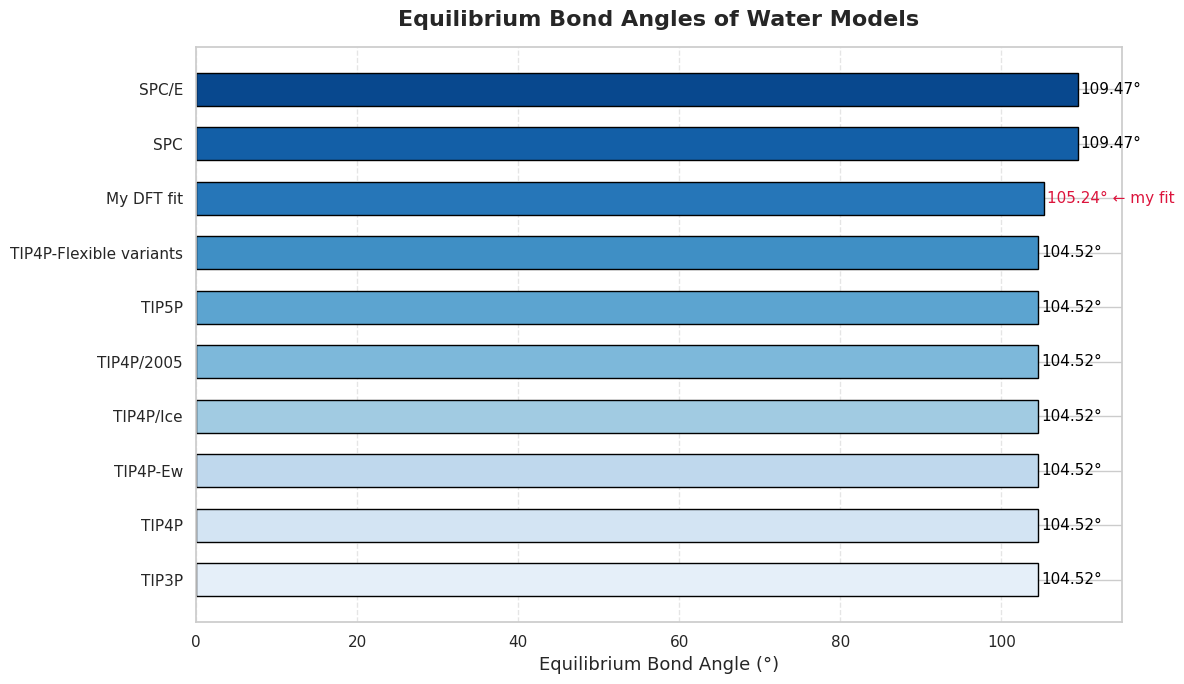

In [ ]:
angle_df = df.copy()
angle_df = angle_df[angle_df["Equilibrium Angle (°)"].apply(lambda x: isinstance(x, (int, float)))].copy()
angle_df = angle_df.sort_values("Equilibrium Angle (°)", ascending=True)

sns.set(style="whitegrid")
plt.figure(figsize=(12, 7))
colors = sns.color_palette("Blues", len(angle_df))

bars = plt.barh(angle_df["Model / Source"], angle_df["Equilibrium Angle (°)"],
                color=colors, edgecolor='black', height=0.6)

for i, bar in enumerate(bars):
    width = bar.get_width()
    model_name = angle_df.iloc[i]["Model / Source"]

    label = f'{width:.2f}°'
    color = 'black'

    if model_name.lower().startswith("my dft fit"):
        label += " ← my fit"
        color = 'crimson'

    plt.text(width + 0.4, bar.get_y() + bar.get_height() / 2,
             label, va='center', fontsize=11, color=color)

plt.xlabel("Equilibrium Bond Angle (°)", fontsize=13)
plt.title("Equilibrium Bond Angles of Water Models", fontsize=16, weight='bold', pad=15)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.grid(axis='x', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.savefig("equilibrium_angles_plot_highlighted.jpg", dpi=450, bbox_inches='tight')
plt.show()
